In [47]:
import glob

import geopandas as gpd
import rasterio
from rasterio.features import geometry_mask
from rasterio.plot import show
import numpy as np

import matplotlib.pyplot as plt

from natsort import natsorted

# Extract SO2 Values on the Roads

In [17]:
# Load the TIF image
tif_file = "/home/krishna/UEInfo/TROPOMI_EXTRACTS/data/SO2_tifs/delhi_15dayavg_so2_2020-01-01.SO2_column_number_density.tif"
tif_data = rasterio.open(tif_file)

In [39]:
# Load the vector (line) file
vector_file = "/home/krishna/UEInfo/TROPOMI_EXTRACTS/data/Delhi_maps/delhi_expressways_2021.geojson" 
vector_data = gpd.read_file(vector_file, driver='GeoJSON')

In [40]:
# Convert the vector data to the same CRS as the TIF data
vector_data = vector_data.to_crs(tif_data.crs)

In [41]:
# Create a mask to identify pixels within the vector area
mask = geometry_mask(vector_data.geometry, out_shape=tif_data.shape, transform=tif_data.transform, invert=False)

In [42]:
# Read the TIF data as a numpy array
tif_array = tif_data.read(1)  # Assuming a single-band TIF, adjust if needed

# Calculate the average pixel value within the masked area
masked_values = np.ma.masked_array(tif_array, mask=mask)
average_pixel_value = np.mean(masked_values)

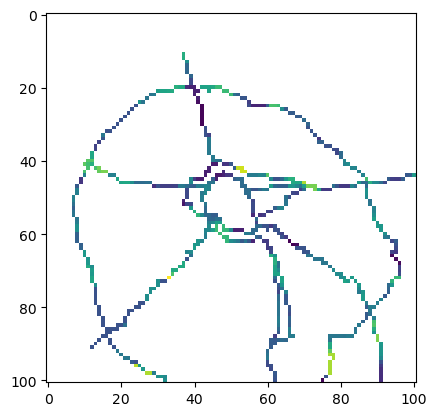

In [43]:
# Plot the TIF image with the masked area
show(masked_values, cmap='viridis')
plt.show()

In [49]:
tifs = glob.glob('/home/krishna/UEInfo/TROPOMI_EXTRACTS/data/SO2_tifs/delhi*.tif')
tifs = natsorted(tifs)

In [67]:
import re

In [72]:
dates = []
avg_so2_roads = []
avg_so2_delhi = []

for tif in tifs:
    tif_data = rasterio.open(tif)
    date = re.findall(r'\d{4}-\d{2}-\d{2}',tif)[0]
    dates.append(date)
    
    mask = geometry_mask(vector_data.geometry, out_shape=tif_data.shape, transform=tif_data.transform, invert=False)
    
    tif_array = tif_data.read(1)
    masked_values = np.ma.masked_array(tif_array, mask=mask)
    average_pixel_value = np.mean(masked_values)
    avg_so2_roads.append(average_pixel_value)
    
    avg_so2_delhi.append(np.mean(tif_array))

In [75]:
import datetime
dates = [datetime.datetime.strptime(date, "%Y-%m-%d") for date in dates]

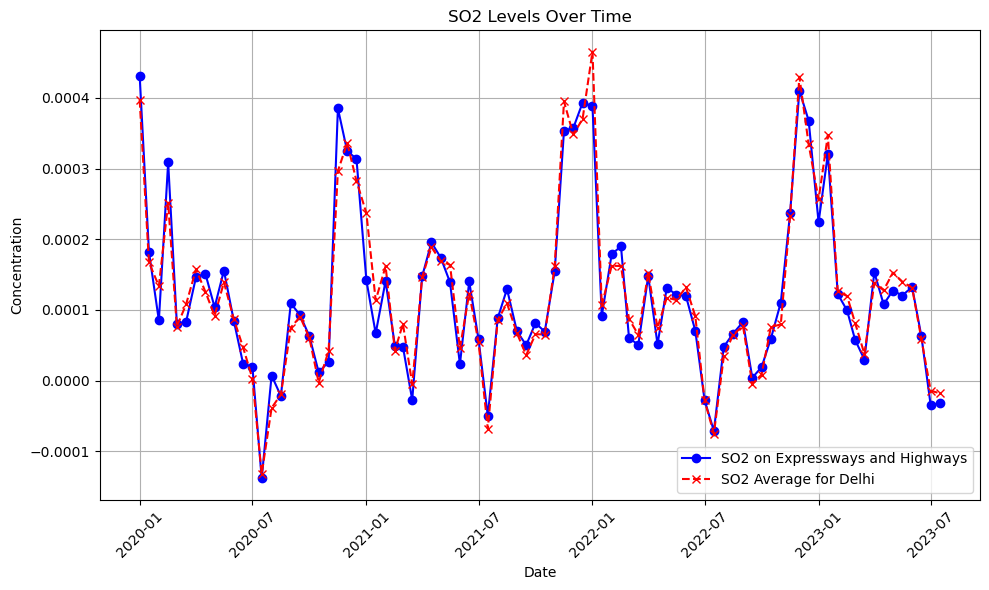

In [76]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

plt.plot(dates, avg_so2_roads, label="SO2 on Expressways and Highways", marker='o', linestyle='-', color='b')
plt.plot(dates, avg_so2_delhi, label="SO2 Average for Delhi", marker='x', linestyle='--', color='r')

# Customize the plot
plt.title("SO2 Levels Over Time")
plt.xlabel("Date")
plt.ylabel("Concentration")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()  # Optional: Adjust layout to prevent clipping of labels
plt.show()

In [58]:
avg_so2_delhi

[0.00039713156413645516,
 0.00016712985405207967,
 0.0001337412800599138,
 0.00025169803134303094,
 7.635207317863548e-05,
 0.00010798138866623355,
 0.0001574833705875675,
 0.00012588424711225163,
 9.180532078089851e-05,
 0.00013892610686239512,
 8.704655190412216e-05,
 4.6929641099306344e-05,
 2.6950819258823184e-06,
 -0.00013200214046189167,
 -3.87412620345283e-05,
 -1.968926970312931e-05,
 7.501878482261047e-05,
 9.031196864844743e-05,
 6.0229817592823266e-05,
 -2.808079739256471e-06,
 4.190350332818919e-05,
 0.0002965012827853505,
 0.0003362663688173413,
 0.00028256721090963503,
 0.0002368682858602806,
 0.00011354063632437569,
 0.00016183495989951076,
 4.245655789986633e-05,
 8.030731813660579e-05,
 -5.096208594070133e-06,
 0.0001459752284199055,
 0.0001887322632255234,
 0.00016935153188692785,
 0.00016370072506791773,
 4.579984446938044e-05,
 0.000123168082631361,
 5.450145581632124e-05,
 -6.841218760278345e-05,
 8.580765894317123e-05,
 0.00010923378346658346,
 6.717952997658419e-